In [1]:
import pandas as pd
import numpy as np

In [4]:
FILE_PATH = '../../data/marketing/criteo_attribution_dataset_sampled_campaign_300_journey_over_2_points_balanced.csv'
df = pd.read_csv(FILE_PATH)
df.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949
1,1,1398349,225512,32320979,28874676,0,-1,-1,0,1,...,30763035,9312274,1461750,29196072,26611394,1973606,30600973,9068204,15351053,32320979_-1
2,2,6206408,991626,29070160,27118781,1,1189040,23460283,1,1,...,30763035,9312274,23032073,29196072,11409686,1973606,9312274,14911188,21091111,29070160_23460283
3,3,12718518,2034017,2567135,10341182,1,2448781,2329559,0,1,...,25259032,7477605,28051086,23549932,32440044,28928366,11989417,29196072,32145478,2567135_2329559
4,4,4850218,748516,12566673,28137208,0,-1,-1,0,0,...,28928366,26597095,29562678,29196072,32440047,1973606,27807725,14911188,18291877,12566673_-1


- **Timestamp**: 캠페인이 노출된 시간
- **UID**: 사용자 고유 ID
- **Campaign**: 캠페인 ID
  - 채널 내 캠페인
- **Conversion**: 노출된지 30일 이내에 구매로 전환 되었으면 1, 아니면 0
- **Conversion Timestamp**: 전환 되었을 때의 시간. 전환되지 않았으면 -1
- **Conversion ID**: 전환이 일어났을 때 ID
- **Click**: 노출된 캠페인을 보고 클릭했으면 1, 클릭하지 않았으면 0
- **Cost**: 광고에 지불한 비용(클릭 당 비용)
- **Cat1-Cat9**: 카테고리 별 광고의 id
- **jid** : user의 id와 conversion id를 합쳐서 유저 별 conversion을 표시
  - 사용자가 여러 개의 캠페인에 걸쳐 전환된 것을 하나로 묶어서 표현하기 위함
  - A라는 사용자가 1번 컨버전이면 A_1
  - A라는 사용자가 2번 컨버전이면 A_2

In [5]:
# jid 확인
df[['uid', 'conversion_id', 'jid']].head()

,uid,conversion_id,jid
0,21670661,17559949,21670661_17559949
1,32320979,-1,32320979_-1
2,29070160,23460283,29070160_23460283
3,2567135,2329559,2567135_2329559
4,12566673,-1,12566673_-1


In [6]:
df.loc[df['uid'] == 21670661]

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949
86085,86085,8910755,1415852,21670661,10474106,0,-1,-1,0,0,...,30763035,9312274,7726221,29196072,11409684,30763035,8549927,29196072,8661620,21670661_-1
92752,92752,8942502,1420110,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,7726221,29196072,11409684,32440053,8549927,29196072,8661620,21670661_17559949
186465,186465,10424011,1677968,21670661,10474106,0,-1,-1,0,0,...,28928366,9312274,7726221,23549932,11409684,30763035,4733288,29196072,21091108,21670661_-1
217423,217423,564852,83349,21670661,10474106,0,-1,-1,0,0,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,6083947,21670661_-1
221879,221879,3474720,548050,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520629,21670661_17559949
226573,226573,12465459,1978991,21670661,10474106,0,-1,-1,0,0,...,28928366,9312274,30867372,29196072,11409684,30763035,8549927,29196072,8661623,21670661_-1
256436,256436,2824629,459388,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,21091108,21670661_17559949
291482,291482,565299,83500,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,6083947,21670661_17559949
307783,307783,137968,35546,21670661,10474106,0,-1,-1,0,0,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,8661620,21670661_-1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602160 entries, 0 to 602159
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0.1           602160 non-null  int64  
 1   Unnamed: 0             602160 non-null  int64  
 2   timestamp              602160 non-null  int64  
 3   uid                    602160 non-null  int64  
 4   campaign               602160 non-null  int64  
 5   conversion             602160 non-null  int64  
 6   conversion_timestamp   602160 non-null  int64  
 7   conversion_id          602160 non-null  int64  
 8   attribution            602160 non-null  int64  
 9   click                  602160 non-null  int64  
 10  click_pos              602160 non-null  int64  
 11  click_nb               602160 non-null  int64  
 12  cost                   602160 non-null  float64
 13  cpo                    602160 non-null  float64
 14  time_since_last_click  602160 non-nu

In [11]:
# 자주 노출되는 상위 50개의 캠페인만 사용.
campaign_cnt_df = df.groupby("campaign")["timestamp"].count().sort_values(ascending=False).head(50).reset_index()
campaign_cnt_df = campaign_cnt_df.rename(
    columns={
        'timestamp':'camp_cnt'
    }
)
campaign_cnt_df

,campaign,camp_cnt
0,10341182,56151
1,30801593,39373
2,15398570,32891
3,15184511,31525
4,28351001,29132
5,29427842,15714
6,5061834,12954
7,18975823,12164
8,30491418,12142
9,6686701,9742


In [13]:
# 캠페인 상위 50개에 해당하는 이벤트만 가져오기
df_part = df.merge(campaign_cnt_df, on='campaign')
df_part.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,9312274,30867372,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,9312274,7726221,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,9312274,30867372,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,9312274,30867372,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890


In [26]:
# 각 유저는 전환하기까지 얼마나 많은 이벤트에 노출되었을까?
event_count_per_jid = df_part.groupby('jid')['timestamp'].count().reset_index().rename(columns={'timestamp':'event_count'})
event_count_per_jid

,jid,event_count
0,10000148_-1,9
1,1000023_5282678,2
2,10000403_29178244,2
3,1000095_27795443,2
4,10001378_24057324,11
...,...,...
95383,9999096_16958422,2
95384,9999669_4594367,2
95385,9999748_-1,21
95386,9999748_25873601,11


In [21]:
# 이벤트 갯수 별 jid 갯수 확인
# 사람마다 몇 개의 광고를 보는지 파악
event_journey = event_count_per_jid.groupby('event_count')['jid'].count().reset_index().rename(columns={'jid':'journey_count'})
event_journey

,event_count,journey_count
0,1,2653
1,2,36617
2,3,17702
3,4,10119
4,5,6548
...,...,...
99,212,1
100,227,1
101,231,1
102,240,1


In [23]:
# jid 별로 몇 종류의 캠페인을 보는지 확인
campaign_count_per_jid = df_part.groupby('jid')['campaign'].nunique().reset_index().rename(columns={'campaign':'campaign_count'})
campaign_count_per_jid

,jid,campaign_count
0,10000148_-1,1
1,1000023_5282678,1
2,10000403_29178244,1
3,1000095_27795443,1
4,10001378_24057324,1
...,...,...
95383,9999096_16958422,1
95384,9999669_4594367,1
95385,9999748_-1,1
95386,9999748_25873601,1


In [25]:
# 캠페인 노출 빈도 별 전환 수 (jid 갯수) 확인
jid_count_per_campaign_count = campaign_count_per_jid.groupby("campaign_count")['jid'].count().reset_index().rename(columns={'jid':'jid_count'})
jid_count_per_campaign_count

,campaign_count,jid_count
0,1,89749
1,2,5120
2,3,472
3,4,44
4,5,3


## 모델의 목적
- 우리가 산정한 마케팅 예산을 각 캠페인에 분배할 예정
- 각 캠페인의 유저 전환에 대한 상대적인 기여도 파악
- 유저에게 노출된 캠페인과 해당 캠페인의 카테고리 등의 Feature를 모아서 전환하는 예측 모델을 생성

## 데이터 전처리 수행
- 캠페인과 cat 데이터들은 전부 카테고리 형식의 데이터
- OHE 진행

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder_camp = OneHotEncoder()
encoder_cat = OneHotEncoder()

camp_ohe = encoder_camp.fit_transform(df_part[['campaign']]).toarray() # 열벡터로 변환
cat_ohe = encoder_cat.fit_transform(df_part[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat8']]).toarray()

In [31]:
cat_ohe.shape

(451364, 324)

In [32]:
# 원본 데이터 백업
df_preprocessed = df_part.copy()

df_preprocessed['cats'] = list(map(np.array, cat_ohe)) # cat_ohe 에 np.array 함수를 적용
df_preprocessed['campaigns'] = list(map(np.array, camp_ohe))

In [33]:
df_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


* one hot encoding 된 결과 df 는 탐색할 필요는 없기 때문에 outer df 에 list 형식으로 넣어주면 관리가 용이하다

## Logistic Regression 을 활용한 마케팅 예산 분배 최적화
* conversion 을 예측하는 모델을 만들고, 전환을 예측했을 때의 logistic regression 의 각 캠페인에 대한 학습된 가중치 (딥러닝에서는 weight, 회귀분석에서는 coefficient 라고 한다) 를 가져온다
* Logistic Regression 의 Weight  =>  attribution weights

In [35]:
# series : cats, campaigns
# many hot encoding 수행을 위한 함수 정의
def pairwise_max(series):
    return np.max(series.tolist(), axis=0).tolist()

In [36]:
aggregations = {
    'campaigns' : pairwise_max,
    'cats' : pairwise_max,
    'click' : 'sum',
    'cost' : 'sum',
    'conversion' : 'max' # 구매한 정보는 1, 아닌 정보는 0으로 유지
}

In [37]:
df_agg = df_preprocessed.groupby('jid').agg(aggregations)
df_agg.head()

,campaigns,cats,click,cost,conversion
jid,,,,,
10000148_-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,0.001278,0
1000023_5282678,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",2,0.002972,1
10000403_29178244,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",2,0.000671,1
1000095_27795443,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",2,0.001216,1
10001378_24057324,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",11,0.057412,1


In [38]:
# 데이터들을 풀어서 하나의 feature 로 만들기
df_agg['features'] = df_agg[['campaigns', 'cats', 'click', 'cost']].values.tolist()
df_agg['features'].head()

jid
10000148_-1          [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1000023_5282678      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10000403_29178244    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1000095_27795443     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10001378_24057324    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: features, dtype: object

In [39]:
X = np.stack(df_agg['features'].map(lambda x : np.hstack(x)).values)
y = df_agg['conversion'].values # 1차원 배열로 변환

In [40]:
X.shape, y.shape

((95388, 376), (95388,))

376개의 feature 중 첫 50개는 노출된 campaign 정보

## 데이터 분할

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## LogisticRegression 식
$$
\hat{y}= \sigma(WX+b)=\sigma(w_1x_1 + w_2x_2 + \cdots + w_nx_n + b)
$$

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [50]:
from sklearn.metrics import accuracy_score

y_train_pred = log_reg.predict(X_train)
y_test_pred  = log_reg.predict(X_test)

print("훈련 데이터 정확도 : {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("테스트 데이터 정확도 : {:.3f}".format(accuracy_score(y_test, y_test_pred)))

훈련 데이터 정확도 : 0.831
테스트 데이터 정확도 : 0.827


In [53]:
n_campaigns = 50
weights = log_reg.coef_[0, :n_campaigns] # 가중치
weights.shape

(50,)

In [54]:
weights

array([-1.80781039, -0.23077135, -2.20826306, -2.33722428, -2.30908036,
       -3.31216516, -1.21484594, -1.2729662 , -3.08581951, -2.7700454 ,
       -3.52791703, -1.23022532, -1.59745916, -1.88835017, -4.52765075,
       -2.32596956, -1.83577122, -3.28397679, -1.82252456, -1.45435971,
       -1.53813007, -2.19654889, -1.55435313, -1.79378751, -0.88413851,
       -2.89458038, -3.62513371, -3.67340812, -2.99999384, -3.03006619,
       -1.21414274, -2.94858341, -2.53325645, -4.07076801, -0.80588786,
       -3.70808731, -1.1519548 , -2.00017943, -2.58851774, -1.37537952,
       -1.74421334, -2.6705553 , -2.23905297, -0.9615596 , -2.17858899,
       -2.70737896, -2.54928497, -3.20363921, -2.72715444, -2.53807327])

* 가중치 = conversion 에 대한 각 캠페인의 기여도
* 이대로는 해석 불가능
* 해석 가능한 형태로 바꿔줘야 한다 => softmax 이용해 정규화해서 기여도 비율로 전환

In [55]:
from sklearn.utils.extmath import softmax

logreg_attrib = softmax([weights]).flatten()
logreg_attrib

array([0.02170738, 0.10507679, 0.01454431, 0.01278456, 0.01314948,
       0.00482253, 0.03927613, 0.03705846, 0.00604749, 0.00829305,
       0.00388664, 0.03867671, 0.02678933, 0.02002763, 0.0014302 ,
       0.01292926, 0.02110883, 0.0049604 , 0.02139032, 0.03091072,
       0.02842681, 0.01471568, 0.02796936, 0.02201393, 0.0546705 ,
       0.00732199, 0.00352658, 0.00336038, 0.00658944, 0.00639423,
       0.03930376, 0.00693707, 0.01050873, 0.00225849, 0.05912034,
       0.00324584, 0.04182558, 0.01790864, 0.00994376, 0.03345105,
       0.02313275, 0.00916056, 0.01410331, 0.05059755, 0.01498236,
       0.00882937, 0.01034163, 0.00537535, 0.00865648, 0.01045823])

In [56]:
logreg_attrib.sum()

1.0

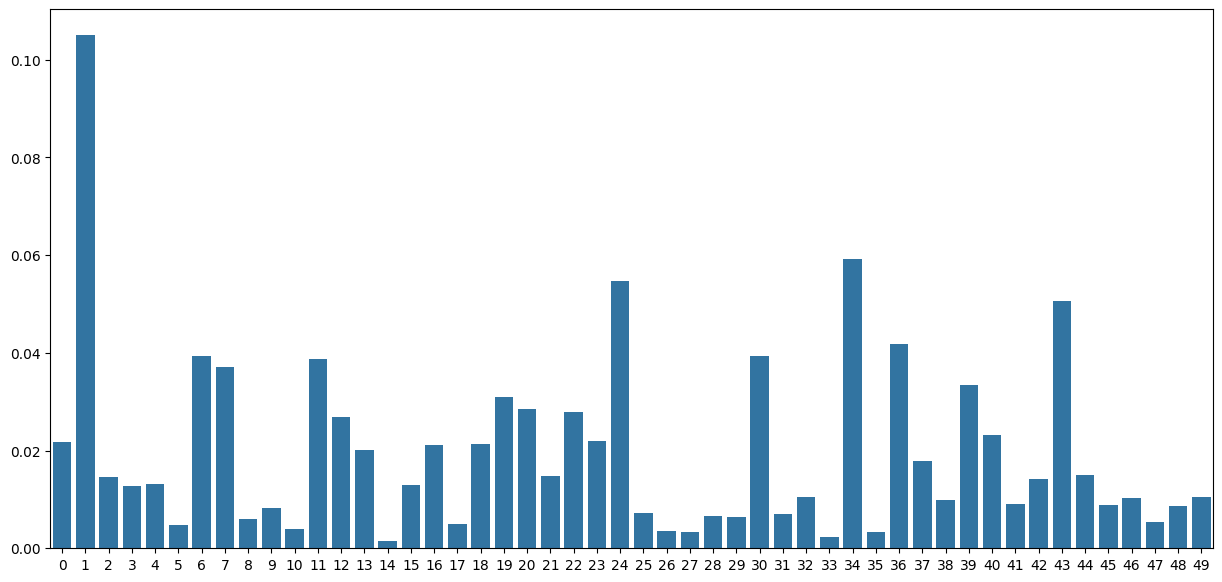

In [57]:
# 가중치 비율 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(x=np.arange(len(logreg_attrib)), y=logreg_attrib)
plt.show()

## Last Interaction Attribution 모델 VS LogReg

In [58]:
df_preprocessed['campaigns'].head()

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: campaigns, dtype: object

In [62]:
# 각 캠페인마다 노출 수를 세는 함수
def count_by_campaign(df):
    result = np.zeros(n_campaigns) # 상위 50개 노출된 캠페인의 갯수

    for campaign_one_hot in df['campaigns'].values:
        real_campaign_idx = np.argmax(campaign_one_hot) # 1이 있는 인덱스
        result[real_campaign_idx] += 1

    return result

campaign_count = count_by_campaign(df_preprocessed)
campaign_count

array([ 2857.,  8113.,  3482.,  2849., 12954.,  9742.,  3301.,  5440.,
        6434.,  9364.,  2705.,  7374.,  4329.,  2760., 56151.,  7890.,
        3427.,  3124.,  2897.,  5199.,  3645.,  3604.,  6717.,  5682.,
        7752., 31525., 32891.,  5337.,  4396.,  6211., 12164.,  4946.,
        3014.,  8565.,  8317.,  3108.,  9387.,  5931.,  2860., 29132.,
        4190.,  3917., 15714.,  2647., 12142.,  7504.,  2572., 39373.,
        4397.,  3332.])

In [64]:
# 각 유저의 conversion ID (JID) 별 제일 마지막에 노출된 데이터의 인덱스
# 1. 전환된 데이터 구하기
df_conv = df_preprocessed.loc[df_preprocessed['conversion'] == 1]
df_conv.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [68]:
idx = (df_conv.groupby(['jid'])['timestamp'].transform(max) == df_conv['timestamp'])
idx

0         False
1         False
2          True
3         False
4         False
          ...  
451354     True
451355     True
451357    False
451358     True
451361     True
Name: timestamp, Length: 238831, dtype: bool

In [70]:
df_last_conv = df_conv[idx]
df_last_conv.head() # conversion 된 것 중 마지막 것들 출력

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13,1112,5733111,907819,1382856,10474106,1,2999687,7740383,0,1,...,29196072,11409684,32440041,8549927,29196072,16022558,1382856_7740383,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
18,1372,2082516,333082,19896277,10474106,1,506082,12500469,1,1,...,29196072,11409684,28928366,8549927,29196072,29520629,19896277_12500469,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
22,1610,2182646,365558,11174755,10474106,1,369350,31240997,1,1,...,6755486,11409684,1973606,8549927,3225256,9491351,11174755_31240997,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28,2352,16059197,2616742,11270325,10474106,1,3946111,2874497,0,1,...,29196072,11409684,29196072,8549927,29196072,29520626,11270325_2874497,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [71]:
# 사용자가 전환되었을 때의 마지막 캠페인 노출 횟수
campaign_conversions = count_by_campaign(df_last_conv)
campaign_conversions

array([ 606.,  638.,  369.,  906., 1694., 1374.,  386., 1292.,  816.,
       1122.,  358.,  571.,  482.,  168., 8413., 1173.,  285.,  409.,
        186.,  456.,  174.,  154., 1668.,  862., 1310., 7052., 4465.,
        376.,  752.,  670., 2023.,  553.,  528.,  481., 1990.,  312.,
        734.,  567.,  168., 3920.,  531.,   39., 2686.,  601., 1546.,
       1073.,   70., 3868.,  352.,  279.])

In [72]:
# 실제 마지막 캠페인을 보고 전환된 비율
# 전환된 횟수 / 노출된 횟수
lta = campaign_conversions / campaign_count
lta

array([0.21211061, 0.07863922, 0.10597358, 0.31800632, 0.13077042,
       0.1410388 , 0.11693426, 0.2375    , 0.12682624, 0.11982059,
       0.1323475 , 0.07743423, 0.11134211, 0.06086957, 0.14982814,
       0.1486692 , 0.08316312, 0.1309219 , 0.06420435, 0.08770917,
       0.04773663, 0.0427303 , 0.24832515, 0.15170715, 0.16898865,
       0.22369548, 0.13575142, 0.07045156, 0.1710646 , 0.10787313,
       0.16631042, 0.11180752, 0.17518248, 0.05615879, 0.23926897,
       0.1003861 , 0.07819325, 0.09559939, 0.05874126, 0.13455993,
       0.12673031, 0.0099566 , 0.17093038, 0.22704949, 0.12732663,
       0.14299041, 0.02721617, 0.09823991, 0.08005458, 0.08373349])

In [73]:
# 모든 전환율의 합이 1이 될 수 있도록 조정
lta_norm = lta / lta.sum()
lta_norm

array([0.03359971, 0.01245697, 0.01678691, 0.05037429, 0.02071489,
       0.02234147, 0.01852316, 0.03762156, 0.02009011, 0.01898037,
       0.02096471, 0.01226609, 0.01763732, 0.00964214, 0.02373376,
       0.02355018, 0.01317358, 0.02073889, 0.01017039, 0.01389371,
       0.0075618 , 0.00676876, 0.03933633, 0.02403141, 0.02676891,
       0.03543483, 0.02150392, 0.01115999, 0.02709776, 0.01708781,
       0.02634466, 0.01771105, 0.02775006, 0.00889592, 0.03790178,
       0.01590182, 0.01238632, 0.01514357, 0.009305  , 0.02131518,
       0.02007491, 0.00157719, 0.0270765 , 0.03596613, 0.02016938,
       0.02265062, 0.00431122, 0.01556185, 0.01268117, 0.01326394])

In [75]:
# 두 개의 데이터 합치기
data1 = pd.DataFrame(
    {
        'attribution' : logreg_attrib,
        'method' : 'logistic',
        'campaign' : range(0, 50)
    }
)
data2 = pd.DataFrame(
    {
        'attribution' : lta_norm,
        'method' : 'last',
        'campaign' : range(0, 50)
    }
)

total = pd.concat([data1, data2]).reset_index()
total.head()

,index,attribution,method,campaign
0,0,0.021707,logistic,0
1,1,0.105077,logistic,1
2,2,0.014544,logistic,2
3,3,0.012785,logistic,3
4,4,0.013149,logistic,4


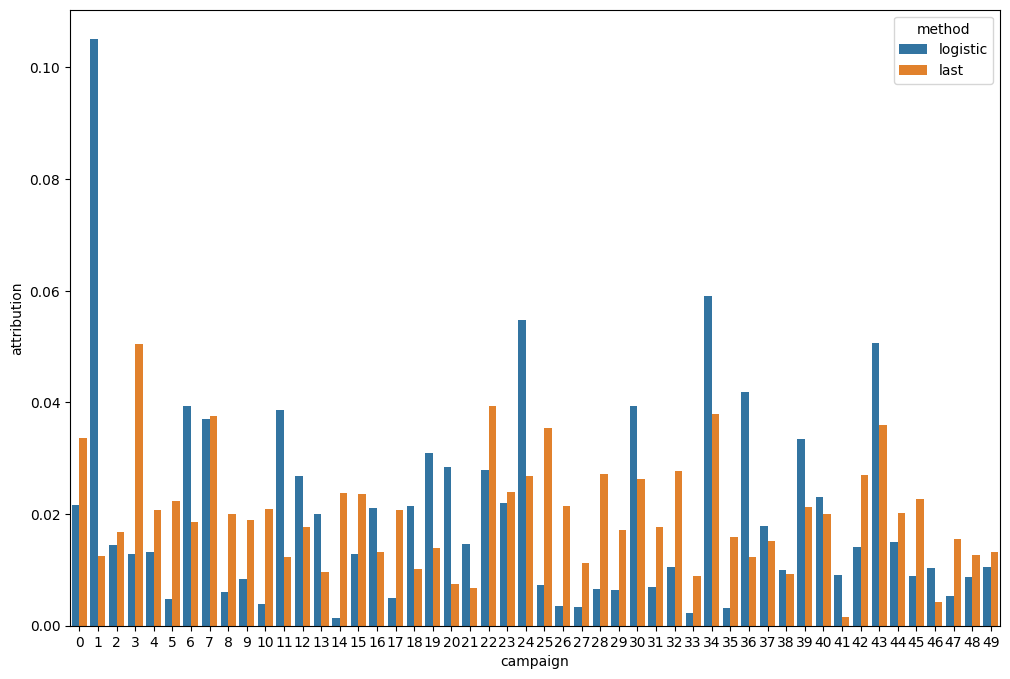

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(data=total, x='campaign', y='attribution', hue='method')
plt.show()

# 마케팅 예산 분배 시뮬레이션
* 예산을 지정한다.
* 예산을 캠페인의 기여도에 맞게 분배한다.
* 과거 유저의 전환 내역을 Replay 한다.
    * 캠페인이 노출되었다면 각 캠페인의 예산을 차감하고
    * 전환이 실제 되었다면 전환에 + 1을 해준다
    * 캠페인이 과거에 노출되었는데, 해당 캠페인에 대한 예산은 다 쓴 상태라면 blacklist 에 넣어준다.
* 계산은 conversion - blacklist 로 한다.

In [77]:
def get_campaign_id(x_journey_step, n_campaigns=50):
  '''
    x_journey_step : 각 행( 유저 한명 한명의 데이터 )의 캠페인
  '''
  return np.argmax(x_journey_step[0:n_campaigns]) # 한 사람한테 노출된 캠페인의 인덱스(0 ~ 49)

def simulate_budget_roi(df, budget_total, attribution):
  # 기여도에 따른 예신 분배 후 캠페인 별 시뮬레이션 진행
  # 예산이 100만원 일 때 기여도가 0.5이면 50만원을 가질 수 있도록 한다.

  # 각 캠페인 별 예산 구하기(올림 처리)
  # budgets = np.ceil(attribution * budget_total)

  # 방어코드 작성 스타일
  budgets = np.ceil(attribution * (budget_total / np.sum(attribution)))

  # 예산을 다 써서 시뮬레이션을 진행할 수 없는 경우
  blacklist = set()

  # 전환이 일어난 경우
  conversions = set()

  # 데이터 세트를 모두 돌면서 시뮬레이션 시작
  for i in range(df.shape[0]):

    # 해당 이벤트에서 노출된 캠페인 id를 가져오기. 0번인지, 1번인지, 35번인지..
    campaign_id = get_campaign_id(df.loc[i]['campaigns'])

    # 해당 jid를 가져온다.
    jid = df.loc[i]['jid']

    # jid가 blacklist에 없다 -> 시뮬레이션 수행이 가능(노출이 가능)
    if jid not in blacklist:

      # 캠페인에 대한 예산이 있으면
      if budgets[campaign_id] >= 1:

        # 예산에서 1원을 차감
        budgets[campaign_id] -= 1

        # 전환 여부 판단
        if df.loc[i]['conversion'] == 1:
          # 전환이 되었으면 전환에 추가
          conversions.add(jid)

      else:
        # 예산이 없으면
        # 이 사람(jid)에 대한 시뮬레이션은 멈춘다.
        blacklist.add(jid)

    # 확실하게 예산 내에서 전환된 사람의 수만 구하기
    # 과거에는 전환이 됐지만, 예산이 부족해 광고를 못 본 사람은 전환이 안 될것이다 라고 생각!
  return len(conversions.difference(blacklist))

In [78]:
sample_data = df_preprocessed.sample(n=10000, random_state=42)
sample_data = sample_data.sort_values('timestamp') # 시간 순으로 정렬
sample_data.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
261820,187138,172,95,24746645,15398570,0,-1,-1,0,0,...,23549932,32440044,29196072,12289067,29196072,9491354,24746645_-1,32891,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
412560,591767,192,107,12128651,30405203,0,-1,-1,0,0,...,29196072,11409684,28928366,27257417,29196072,15351053,12128651_-1,2647,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
358173,456451,246,141,2038555,14235907,0,-1,-1,0,0,...,29196072,32440044,1973606,20520724,9068204,18291877,2038555_-1,5682,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
287833,570052,303,180,9805915,13947795,0,-1,-1,0,0,...,29196072,32440047,5824238,9312274,29196072,29196072,9805915_-1,3604,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
412224,515341,399,236,20959073,30405203,0,-1,-1,0,1,...,29196072,11409684,28928366,17368294,29196072,29196072,20959073_-1,2647,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


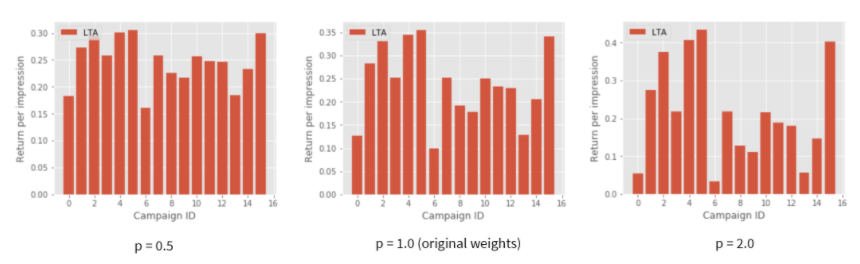

In [79]:
pitches = np.arange(0, 3, 0.5)
pitches

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [81]:
 # Last Interaction 시뮬레이션
budget_total = 5000

budget_lta = [] # 피치에 따른 전환 횟수

for pitch in pitches:
    conversion = simulate_budget_roi(sample_data.reset_index(), budget_total, lta**pitch)
    print(pitch, conversion)
    budget_lta.append(conversion)

0.0 1675
0.5 1807
1.0 1795
1.5 1730
2.0 1623
2.5 1491


In [82]:
# LogisticRegression

budget_total = 5000
budget_logreg = []

for pitch in pitches:
    conversion = simulate_budget_roi(sample_data.reset_index(), budget_total, logreg_attrib**pitch)
    print(pitch, conversion)
    budget_logreg.append(conversion)

0.0 1675
0.5 1707
1.0 1531
1.5 1320
2.0 1145
2.5 937


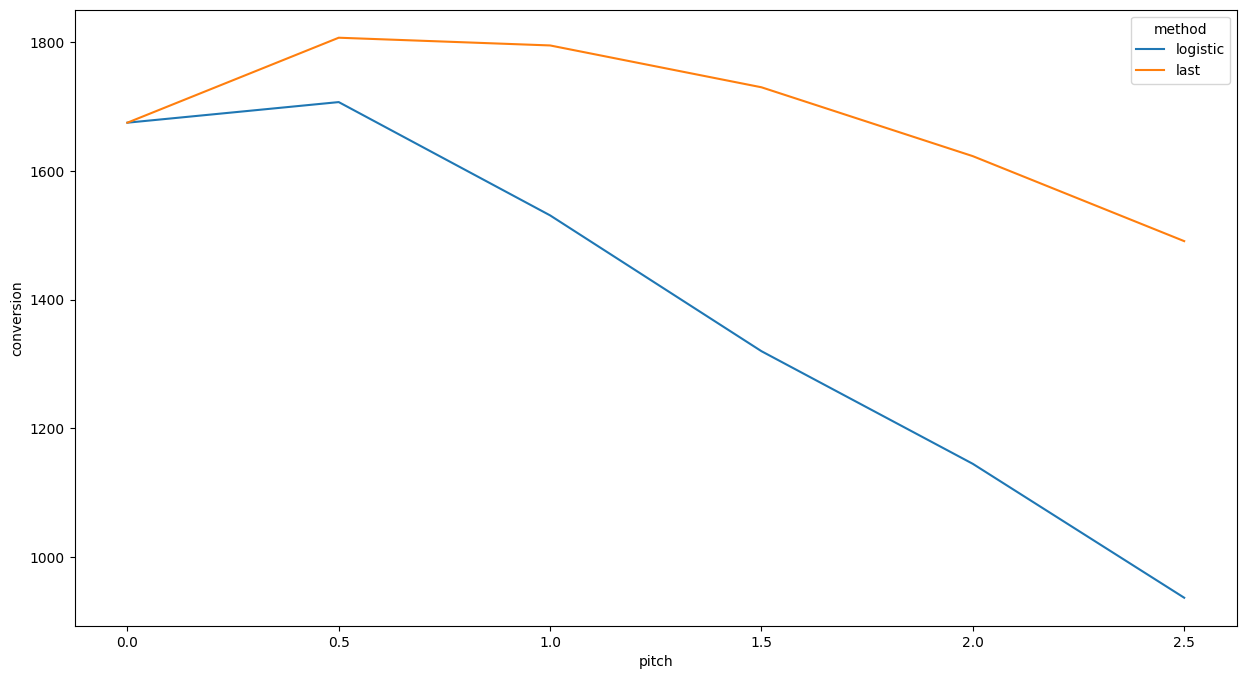

In [83]:
data1 = pd.DataFrame({"conversion":budget_logreg, "method": "logistic", "pitch": pitches})
data2 = pd.DataFrame({"conversion":budget_lta, "method": "last", "pitch": pitches})
total_simulated = pd.concat([data1, data2]).reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data = total_simulated, x='pitch' , y='conversion', hue = 'method')
plt.show()

* pitch=0.5 일 때 이상적임

In [84]:
logreg_attrib**0.5

array([0.14733426, 0.32415551, 0.12059979, 0.11306885, 0.1146712 ,
       0.0694444 , 0.19818205, 0.19250573, 0.07776561, 0.09106617,
       0.06234295, 0.19666394, 0.16367446, 0.141519  , 0.03781794,
       0.11370692, 0.14528879, 0.07043009, 0.14625428, 0.17581445,
       0.16860252, 0.12130822, 0.16724043, 0.14837091, 0.23381724,
       0.08556864, 0.05938503, 0.0579688 , 0.08117539, 0.07996395,
       0.19825175, 0.08328907, 0.1025121 , 0.04752353, 0.24314674,
       0.05697231, 0.20451302, 0.13382317, 0.0997184 , 0.18289629,
       0.15209455, 0.09571082, 0.11875738, 0.224939  , 0.12240247,
       0.09396474, 0.10169382, 0.07331678, 0.09304022, 0.1022655 ])

In [88]:
# budget_total 이 주어졌을 때 각 캠페인에 투입되어야 할 예산
budget_total = 5000

# 각 캠페인마다 기여도에 따라서 budget_total 을 얼마만큼 가져가야 할 지 계산
logreg_attrib ** 0.5 * (budget_total / np.sum(logreg_attrib) ** 1.5)

array([ 736.67127617, 1620.7775526 ,  602.9989338 ,  565.34423933,
        573.35597928,  347.22201167,  990.91027223,  962.52867401,
        388.82804547,  455.33083151,  311.71473064,  983.31970347,
        818.3723081 ,  707.59498341,  189.08971443,  568.53460134,
        726.4439614 ,  352.15047146,  731.27141068,  879.07226247,
        843.01261346,  606.54111186,  836.20215252,  741.85455254,
       1169.08620505,  427.84319715,  296.9251544 ,  289.84401496,
        405.87695124,  399.81976606,  991.25873686,  416.44535398,
        512.56048952,  237.61767022, 1215.73368206,  284.86155905,
       1022.56510497,  669.11586818,  498.59198055,  914.48146063,
        760.47275726,  478.55411972,  593.78688189, 1124.69499084,
        612.01235027,  469.82368109,  508.46911269,  366.58387657,
        465.20107739,  511.32751892])